In [95]:
import pandas as pd
import datetime as dt

dataset = pd.read_csv('./data/BTC-Daily.csv')

# convert column date of dataset to datetime
dataset['date'] = pd.to_datetime(dataset['date'])

# filter dataset to get data from 2015-01-01 to 2016-12-31
dataset = dataset[(dataset['date'] >= dt.datetime(2015, 1, 1)) & (dataset['date'] <= dt.datetime(2016, 12, 31))]

# describe dataset
dataset.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,7.310000e+02,731.000000,731.000000,731.000000,731.000000,7.310000e+02,731.000000
mean,1.451606e+09,418.808933,426.046963,411.109699,419.618687,3.505314e+06,9842.745636
std,1.824473e+07,180.693511,182.968195,178.365111,181.763195,3.538736e+06,10845.571388
min,1.420070e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000
25%,1.435838e+09,248.825000,254.625000,243.080000,248.720000,1.592401e+06,3796.320000
50%,1.451606e+09,394.620000,407.800000,382.990000,395.100000,2.508091e+06,6228.080000
75%,1.467374e+09,579.205000,587.365000,572.735000,581.410000,4.183825e+06,12128.635000
max,1.483142e+09,976.460000,980.740000,950.000000,975.970000,4.595289e+07,123599.760000


In [96]:
import numpy as np

# create a dataset where each row contains the closing prices of the previous n days

# n is the number of days to look back
n = 5

# drop unix and Volume BTC columns
dataset_filtered = dataset.drop('unix', axis=1) \
    .drop('Volume BTC', axis=1) \
    .drop('close', axis=1) \
    .drop('date', axis=1) \
    .drop('symbol', axis=1) \
    .to_numpy()
labels_filtered = dataset['close'].to_numpy()

dataset_final = np.array(
    [ 
        np.column_stack([dataset_filtered[j,:] for j in range(i-n, i)]).flatten()
        for i in range(n, len(dataset_filtered))
    ]
)[:-1]
labels_final = labels_filtered[n+1:]

# normalize dataset_final
dataset_final -= dataset_final.mean(axis=0)
dataset_final /= dataset_final.std(axis=0)

# normalize labels_final
labels_final -= labels_final.mean()
labels_final /= labels_final.std()

#check that dataset final and labels final have the same size
print(dataset_final.shape)
print(labels_final.shape)


(725, 20)
(725,)


[[ 2.98252398  3.06303871  3.12313272 ... -0.18723236  0.19943622
  -0.24800943]
 [ 3.04027133  3.09899853  2.86525464 ...  0.20515024 -0.2471051
  -0.58907135]
 [ 3.07602496  2.84266672  2.6834204  ... -0.24421495 -0.58837674
  -0.5419099 ]
 ...
 [-0.79033998 -0.78966396 -0.78898739 ... -0.90814447 -0.90686241
  -0.01059935]
 [-0.79033998 -0.78966396 -0.78898739 ... -0.90814447 -0.00954904
   3.01461315]
 [-0.79033998 -0.78966396 -0.85709136 ... -0.00515661  3.01752363
   0.96398495]]


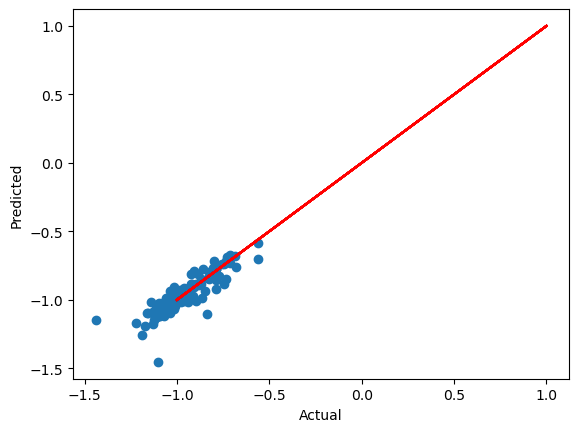

In [100]:
# make a regression of the dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(dataset_final)

# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(dataset_final, labels_final, test_size=0.2, shuffle=False)

# create a linear regression model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

# calculate the r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# plot the equation y = x
k = dataset_final.std(axis=0)
plt.plot([-k, k], [-k, k], 'r')

plt.show()

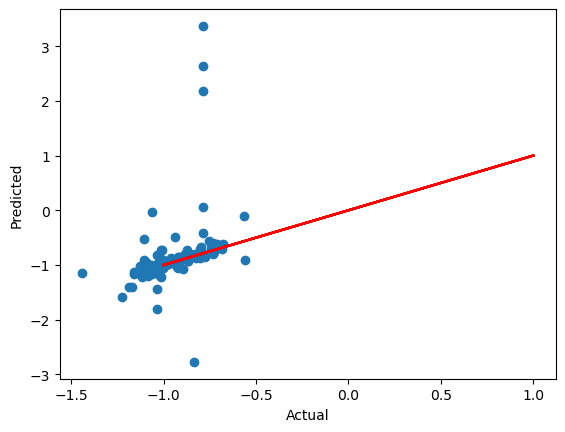

In [102]:
# make a quadratic regression of the dataset
from sklearn.preprocessing import PolynomialFeatures

# create a quadratic regression model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# create a linear regression model
model = LinearRegression()

# train the model
model.fit(X_train_poly, y_train)

# predict the test set
y_pred = model.predict(X_test_poly)

# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

# calculate the r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# plot the equation y = x
k = dataset_final.std(axis=0)
plt.plot([-k, k], [-k, k], 'r')

plt.show()

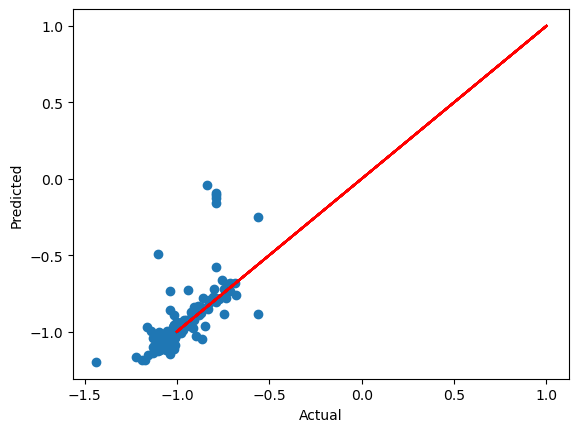

Linear Regression
Mean Squared Error:  0.024772059659186243
Mean Absolute Error:  0.07207089048167943
R2 Score:  -0.3904631443931177


In [104]:
# make a kernel gaussian regression of the dataset
from sklearn.kernel_ridge import KernelRidge

# create a kernel gaussian regression model
model = KernelRidge(kernel='rbf', alpha=1e-3)

# train the model
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

# calculate the r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# plot the equation y = x
k = dataset_final.std(axis=0)
plt.plot([-k, k], [-k, k], 'r')

plt.show()

# print metrics
print('Linear Regression')
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))
